<a href="https://colab.research.google.com/github/adinsa1/DATA205-PROJECT/blob/main/AssefaData205Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# 1. Project Title: Analysis of Daily Arrests in Mongomery County

# 2. Purpose of the Project: Select appropriate dataset on Daily Arrests in
#    Montgomery County, import and clean the dataset, perform data analysis,
#    to observe unique findings and reach conclusions.

# 3. Source of the Dataset: dataMontgomerycountymd.gov

# 4. Name of the Dataset: Daily Arrests

In [70]:
# 5. Load libraries:

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [72]:
# 6. Import the Dataset:

In [73]:
#df=pd.read_csv('/content/Daily_Arrests_20241001 (1).csv')
df=pd.read_csv('https://raw.githubusercontent.com/adinsa1/DATA205-PROJECT/refs/heads/main/Daily_Arrests_20241001%20(1).csv')


In [74]:
# 7. View pertinent information about the Dataset

In [75]:
# 7.1 View the First Five Lines of the Dataset

In [76]:
df.head()

,LAST NAME,FIRST NAME,MIDDLE NAME,AGE,STREET,CITY,STATE,ARREST DATE,OFFENSE
0,ENCARNAION HERASME,LUIS,NaN,24,Block Of 6841 TREXLEY,ASHFORK,MD,09/19/2024,VIOLATE PROTECTIVE ORDER
1,DEL CID-PALACIOS,JEFFREY,MITCHELL,34,11700 Block Of Leona St,SILVER SPRING,MD,09/19/2024,INTIMIDATE/INFLU JUROR-FELONY OFF
2,CHAVEZ,SANDRA,NaN,21,0 Block Of Silver Kettle Court,GAITHERSBURG,MD,09/19/2024,ASSAULT-SECOND DEGREE
3,PEREZ GONZALES,JOSE,NaN,37,12900 Block Of TWINBROOK PKWY,ROCKVILLE,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
4,SIMON,DAVID,BRETT,74,12800 Block Of BRUSHWOOD TERR,Potomac,MD,09/19/2024,DRIVING UNINSURED VEHICLE


In [77]:
# 7.2 View information on the Columns and Rows

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LAST NAME    473 non-null    object
 1   FIRST NAME   473 non-null    object
 2   MIDDLE NAME  376 non-null    object
 3   AGE          473 non-null    int64 
 4   STREET       473 non-null    object
 5   CITY         473 non-null    object
 6   STATE        473 non-null    object
 7   ARREST DATE  473 non-null    object
 8   OFFENSE      473 non-null    object
dtypes: int64(1), object(8)
memory usage: 33.4+ KB


In [79]:
# 7.3 Check if There are NAs
df.isna().sum()

,0
LAST NAME,0
FIRST NAME,0
MIDDLE NAME,97
AGE,0
STREET,0
CITY,0
STATE,0
ARREST DATE,0
OFFENSE,0


In [80]:
# 7.4 View the Statistical Characteristic of the Dataset
df.describe()

,AGE
count,473.000000
mean,34.012685
std,12.233595
min,16.000000
25%,25.000000
50%,31.000000
75%,41.000000
max,86.000000


In [81]:
# 8. Exploratory Data Analysis of Areas of Interest
# 8. 1 Daily Arrests by City


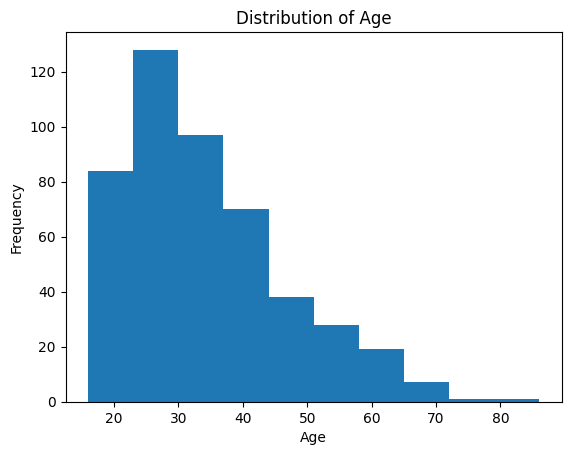

In [82]:
plt.hist(df['AGE'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

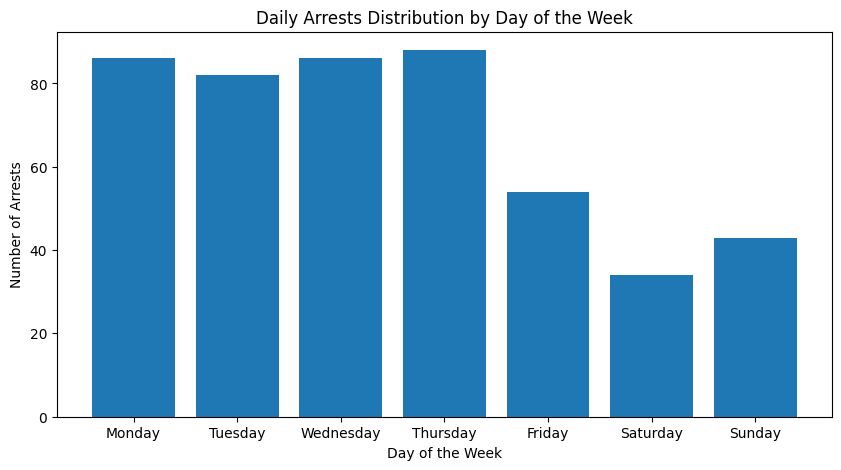

In [83]:

# Convert 'ARREST_DATE' to datetime objects if it's not already
if not pd.api.types.is_datetime64_any_dtype(df['ARREST DATE']):
  df['ARREST DATE'] = pd.to_datetime(df['ARREST DATE'])

# Extract the day of the week (0=Monday, 6=Sunday)
df['DayOfWeek'] = df['ARREST DATE'].dt.dayofweek

# Group by day of the week and count the number of arrests
day_counts = df.groupby('DayOfWeek')['ARREST DATE'].count()



# Map the day of the week index to its name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']



# Create a bar graph
plt.figure(figsize=(10, 5))
plt.bar(day_names, day_counts)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Arrests")
plt.title("Daily Arrests Distribution by Day of the Week")
plt.show()



We are interested in these types of arrest:-
1. `(DRIVING/ATTEMPTING TO) DRIVE MOTOR VEH. ON HWY W/O REQ. LICENSE AND AUTHORIZATION`
2. `PERSON DRIVING MOTOR VEH. ON (HWY., PUBLIC USE PROPERTY) ON SUSPENDED LIC. AND PRIVILEGE`
3. `(DRIVING, ATTEMPTING TO DRIVE) VEHICLE WHILE UNDERTHE INFLUENCE OF ALCOHOL`
4.`DRIVING UNINSURED VEHICLE`
5.



In [84]:
# lets create a new dataframe that only contains driving related offense
# case=false is for letter senstive
# na=false is missing number just ignore
driving_df = df[df['OFFENSE'].str.contains('driving', case=False, na=False)]
driving_df.head()


,LAST NAME,FIRST NAME,MIDDLE NAME,AGE,STREET,CITY,STATE,ARREST DATE,OFFENSE,DayOfWeek
4,SIMON,DAVID,BRETT,74,12800 Block Of BRUSHWOOD TERR,Potomac,MD,2024-09-19,DRIVING UNINSURED VEHICLE,3
23,ALBERTO CHAMPI,JUAN,NaN,35,2000 Block Of RANDLPH,SILVER SPRING,MD,2024-09-20,(DRIVING/ATTEMPTING TO) DRIVE MOTOR VEH. ON HW...,4
31,IZQUIERDO,STEVEN,JOAU,31,100 Block Of MOUNTAIN CREEK DR,FREDERICK,MD,2024-09-21,(DRIVING/ATTEMPTING TO) DRIVE MOTOR VEH. ON HW...,5
40,BETHANCOURT HERNANDEZ,ROBINSIN,ROMUALDO,26,14200 Block Of lewisdale rd,Clarksburg,MD,2024-09-23,"PERSON DRIVING MOTOR VEH. ON (HWY., PUBLIC USE...",0
44,ALBA,SHAMIKA,KOYCE,34,2900 Block Of SHAMARD OAK LN,WOODBRIDGE,VA,2024-09-23,"PERSON DRIVING MOTOR VEH. ON (HWY., PUBLIC USE...",0


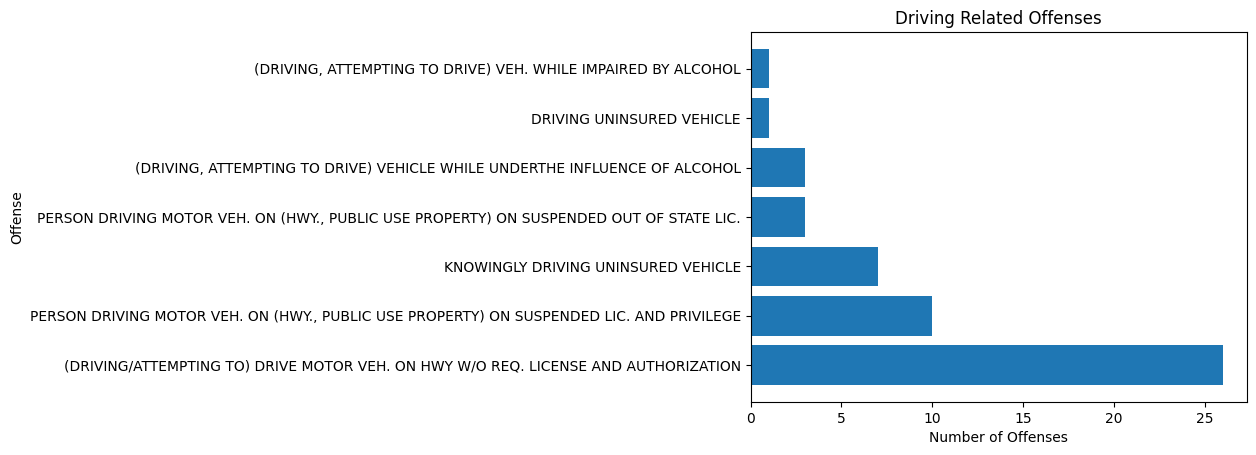

In [85]:
# Calculate the count of each offense so we can later graph it
offense_counts = driving_df['OFFENSE'].value_counts()


# Plot the horizontal bar chart
plt.barh(offense_counts.index, offense_counts.values)

# Add labels and title
plt.xlabel('Number of Offenses')
plt.ylabel('Offense')
plt.title('Driving Related Offenses')

plt.show()

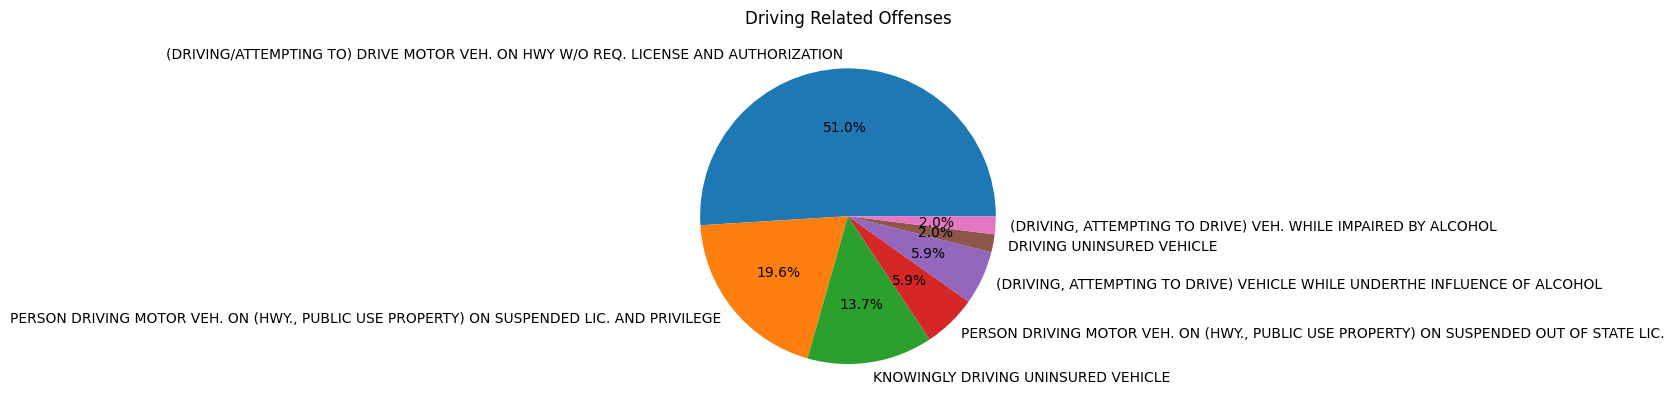

In [86]:
plt.pie(offense_counts, labels=offense_counts.index, autopct='%1.1f%%')
plt.title('Driving Related Offenses')
plt.show()

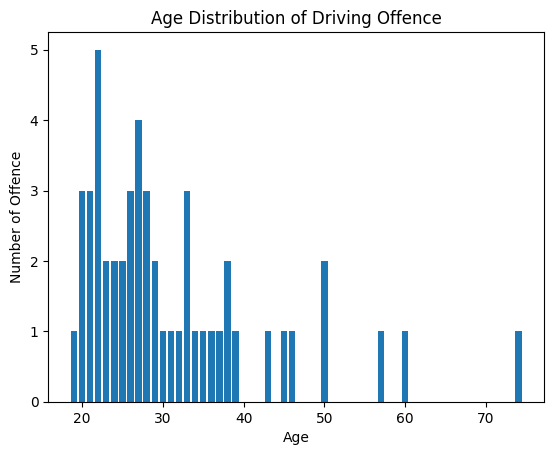

In [87]:
# Find out age disribution of driving offence
age_counts = driving_df['AGE'].value_counts()
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age')
plt.ylabel('Number of Offence')
plt.title('Age Distribution of Driving Offence')
plt.show()




In [88]:
# Driving Offence by Day of the Week


1. Do age distirubiton for driving offense
2. What day of week most driving offense happend.

<ipython-input-89-dec8df87b6be>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driving_df['DayOfWeek'] = driving_df['ARREST DATE'].dt.dayofweek


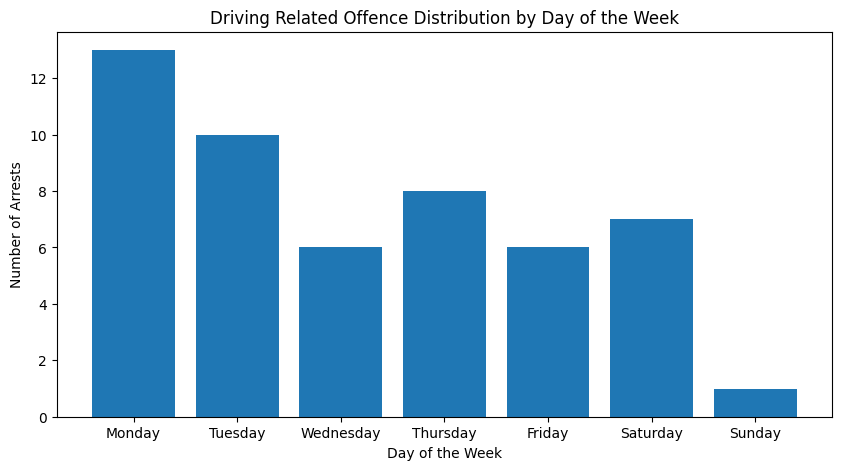

In [89]:

# # Convert 'ARREST_DATE' to datetime objects if it's not already
# if not pd.api.types.is_datetime64_any_dtype(df['ARREST DATE']):
#   df['ARREST DATE'] = pd.to_datetime(df['ARREST DATE'])

# Extract the day of the week (0=Monday, 6=Sunday)
driving_df['DayOfWeek'] = driving_df['ARREST DATE'].dt.dayofweek

# Group by day of the week and count the number of arrests
day_counts = driving_df.groupby('DayOfWeek')['ARREST DATE'].count()



# Map the day of the week index to its name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']



# Create a bar graph
plt.figure(figsize=(10, 5))
plt.bar(day_names, day_counts)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Arrests")
plt.title("Driving Related Offence Distribution by Day of the Week")
plt.show()

